<a href="https://colab.research.google.com/github/kwangyel/ugb-simulation/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
# import matplotlib.image as mpimg
from numpy import savetxt
from numpy import loadtxt
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
import pandas as pd
import sklearn.model_selection as model_selection
from sklearn import preprocessing
from keras.models import model_from_json

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
dataload = loadtxt('/content/drive/My Drive/ugm_data/trn_data_01_17.csv', delimiter=',')
dataload.shape

(20300, 8)

In [ ]:
# xdata=preprocessing.normalize(dataload[:,0:5])
xdata=dataload
# dataload

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(xdata[:,0:7], xdata[:,7:8], test_size=0.25)

In [ ]:
X_train.shape

(15225, 7)

Text(0.5, 0, 'data')

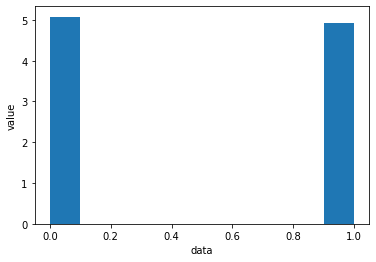

In [ ]:
plt.hist(y_train,density=True)
plt.ylabel('value')
plt.xlabel('data')

In [ ]:
input_dim=X_train.shape[1]
output_dim=y_train.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(5, input_dim=input_dim))
model.add(Activation('relu'))
# model.add(Dropout(0.15))
model.add(Dense(7))
model.add(Activation('relu'))
# model.add(Dropout(0.20))
# model.add(Dense(5))
# model.add(Activation('relu'))
model.add(Dense(output_dim))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Training...")
model.fit(X_train, y_train, nb_epoch=500, validation_data=(X_test,y_test), batch_size=256,verbose=2)

# print("Generating test predictions...")
# preds = model.predict_classes(X_test, verbose=0)
# preds
# def write_preds(preds, fname):
#     pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

# write_preds(preds, "keras-mlp.csv")

Training...


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  from ipykernel import kernelapp as app


Train on 15225 samples, validate on 5075 samples
Epoch 1/500
 - 0s - loss: 126.3289 - accuracy: 0.5084 - val_loss: 75.8376 - val_accuracy: 0.5066
Epoch 2/500
 - 0s - loss: 51.0862 - accuracy: 0.5102 - val_loss: 30.3711 - val_accuracy: 0.5092
Epoch 3/500
 - 0s - loss: 17.4567 - accuracy: 0.5121 - val_loss: 6.0141 - val_accuracy: 0.5103
Epoch 4/500
 - 0s - loss: 1.6514 - accuracy: 0.5844 - val_loss: 0.5893 - val_accuracy: 0.6776
Epoch 5/500
 - 0s - loss: 0.5486 - accuracy: 0.7275 - val_loss: 0.4893 - val_accuracy: 0.8024
Epoch 6/500
 - 0s - loss: 0.4898 - accuracy: 0.7999 - val_loss: 0.4781 - val_accuracy: 0.8104
Epoch 7/500
 - 0s - loss: 0.4802 - accuracy: 0.8054 - val_loss: 0.4728 - val_accuracy: 0.8146
Epoch 8/500
 - 0s - loss: 0.4739 - accuracy: 0.8099 - val_loss: 0.4691 - val_accuracy: 0.8164
Epoch 9/500
 - 0s - loss: 0.4677 - accuracy: 0.8138 - val_loss: 0.4605 - val_accuracy: 0.8201
Epoch 10/500
 - 0s - loss: 0.4633 - accuracy: 0.8168 - val_loss: 0.4548 - val_accuracy: 0.8234
Epoc

In [ ]:
modelname="model_01_1730"

In [ ]:
#saving the model to file
model_json = model.to_json()
with open("/content/drive/My Drive/ugm_data/models/"+modelname+".json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/drive/My Drive/ugm_data/models/"+modelname+".h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/ugm_data/models/'+modelname+'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/ugm_data/models/"+modelname+".h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test,y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 88.30%


In [ ]:
testdata=loadtxt('/content/drive/My Drive/ugm_data/test_data_extra_full.csv', delimiter=',')
testdata.shape

(553000, 7)

In [ ]:
ypred=loaded_model.predict_proba(testdata[:,0:7],verbose=1)

553000/553000 [==============================] - 8s 14us/step


In [ ]:
ynew=ypred

In [ ]:
ytestnew=ynew.reshape(632,875)

In [ ]:
savetxt('/content/drive/My Drive/ugm_data/projected_2020.txt',ytestnew,delimiter=' ')

In [ ]:
3ytestnew[ytestnew>0.8]=1
ytestnew[ytestnew<0.8]=0

In [ ]:
ytestnew

array([[0.9538585 , 0.9339557 , 0.94252956, ..., 0.9582137 , 0.93428624,
        0.8902997 ],
       [0.9215163 , 0.9075118 , 0.91993487, ..., 0.9839409 , 0.9410033 ,
        0.9018932 ],
       [0.9263991 , 0.91370976, 0.92596936, ..., 0.99618965, 0.9731817 ,
        0.9129076 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00578746, 0.00504664,
        0.00439882],
       [0.        , 0.        , 0.        , ..., 0.00561911, 0.00490132,
        0.00427249],
       [0.        , 0.        , 0.        , ..., 0.00544548, 0.00474903,
        0.00414196]], dtype=float32)

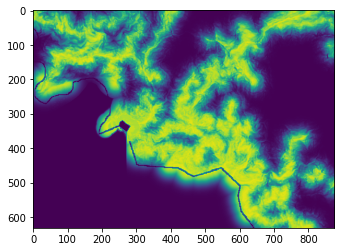

In [ ]:
plt.imshow(ytestnew)

In [ ]:
score

[0.016295202698421957, 0.9945980310440063]

In [ ]:
xreal=X_train[12000]

In [ ]:
y_real=y_train[12000]
xreal.shape

(5,)

In [ ]:
xreal=xreal.reshape((5,))
# x_real
# xreal
# ynew=loaded_model.predict_classes([x_real])

In [ ]:
xreal=xreal.reshape((1,5))
xreal.shape
xreal[0:1].shape

(1, 5)

In [ ]:
ynew=loaded_model.predict_classes(xreal[0:1])

In [ ]:
ynew

array([[0]], dtype=int32)